# Complex Network Project

## General informations

The objective of this analysis is to understand the forms of interactions of the ants, over a day, and the evolution over a period of 40 days (every 10 days). # TODO : préciser noeuds etc
The dataset is composed of ants represented by nodes, and the number of their interactions by edges.

By interaction patterns, we mean to identify different clusters of ants, which would be assigned to different tasks (which we cannot identify precisely, but that is not the point). Thus, we expect to find more interactions in sub-clusters. 
A second question is related to group dynamics: do ant subgroups remain fixed? Do they change? Can we identify ants with more interactions?

*!!annonce du plan!!*

### Sources and Packages 

Sah, Pratha; José David Méndez; Shweta Bansal, 2018, "Insecta_ants_proximity_weighted_weighted_ant_mersch_colony4_day40.graphml", Animal Social Network Repository, https://doi.org/10.7910/DVN/N5YHLL/WBH4ZT, Harvard Dataverse, V3

https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/N5YHLL/WBH4ZT&version=3.0

In [112]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

### Import dataset

Amélioration : charger les données automatiquement pour élargir la recherche

In [42]:
graph_d1 = nx.read_graphml('ants_1.graphml')
graph_d10 = nx.read_graphml('ants_10.graphml')
graph_d20 = nx.read_graphml('ants_20.graphml')
graph_d30 = nx.read_graphml('ants_30.graphml')
graph_d40 = nx.read_graphml('ants_40.graphml')

## Analysis

## I. Essentials functions

#### 1. General function
The aim of this function it is to get essentials informations about the graph's structure, by graph.

Node-Edge description : 
- Neighbourhood (nodes sharing a link)
- Degree (number of neighbors)

- Out-degree (number of outgoing edges)
- In-degree (number of incoming edges)

- Weight of edge
- Strenght (sum of weight of adjacent edge)

Network descriptors: 
- Average degree: real network are sparses

In [151]:
def get_graph_general_info(graph):
    print("#####")
    print("- Number of nodes:", graph.number_of_nodes())
    print("- Number of edges:", graph.number_of_edges())
    print('- Density:', nx.density(graph))
    print('- Transitivity:',  nx.transitivity(graph))
    print('- Diameter:', nx.diameter(graph, e=None, usebounds=False))
    print('- Average shortest path:', nx.average_shortest_path_length(graph))
    # TODO : complete
    print('- Average distance:') #Must be short
    

def get_graph_general_info2(graph):
    print("Available nodes (top ten):", sorted(list(graph.nodes)[1:10]))
    print("Available edges (top ten):", sorted(list(graph.edges)[1:10]))
    print('Weighted Degree:', graph.degree())
    print("Node degree:", (dict(graph.degree())))
    print('Closeness:', sorted(nx.closeness_centrality(graph).items(), key = lambda x: x[1], reverse=True))
    print('Betweenness:', sorted(nx.betweenness_centrality(graph, k = 30, weight = 'd0').items(), key = lambda x: x[1], reverse=True))
    

def compare_network(list_graph):
    nodes = []
    edges = []
    density = []
    transitivity = []
    shortest_path =[]
    average_dist = []
    diameter = []

    for graph in list_graph:
        nodes.append(graph.number_of_nodes())
        edges.append(graph.number_of_edges())
        density.append(nx.density(graph))
        transitivity.append(nx.transitivity(graph))
        shortest_path.append(nx.average_shortest_path_length(graph))
        #nx.average
    
    dict = {
        'nodes' : nodes,
        'edges' : edges,
        'density': density,
        'transitivity': transitivity,
        'shortest_path_lenght': shortest_path
    } 
    return dict

def rand_color(nb_col):
    col = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(nb_col)]
    print(col)
    return col

# TODO : PENSER A CHANGER X SELON LE NOMBRE DE GRAPHES D'ENTREE
def plot(dico, col_list):
    col = random.choice(col_list)
    x = list([i + 1 for i in range(0, 5)])
    x = [i * 10 for i in x]
    print(x)
    for key, val in dico.items():
        print(key, val)
        plt.bar(x,val, color = col)
        plt.title(key, fontsize= 17) 
        plt.xlabel("Day", fontsize= 13)
        #plt.ylabel("Number of Ants (Nodes)", fontsize= 13)
        plt.show()


In [26]:
get_graph_general_info(graph_d1)
get_graph_general_info(graph_d40)

#####
- Number of nodes: 102
- Number of edges: 4269
- Density: 0.8287711124053582
- Transitivity: 0.8558572372474511
- Diameter: 2
- Average shortest path: 1.1712288875946417
- Average distance:
#####
- Number of nodes: 35
- Number of edges: 485
- Density: 0.8151260504201681
- Transitivity: 0.8714934146885929
- Diameter: 2
- Average shortest path: 1.184873949579832
- Average distance:


In [101]:
dico = compare_network([graph_d1, graph_d10, graph_d20, graph_d30, graph_d40])

['#ADCC34', '#F92883', '#889CA1', '#023153', '#8B6D93']
[10, 20, 30, 40, 50]
nodes [102, 102, 73, 55, 35]


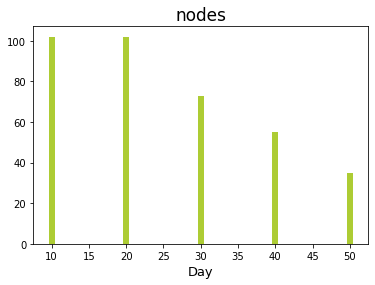

edges [4269, 4036, 2184, 1252, 485]


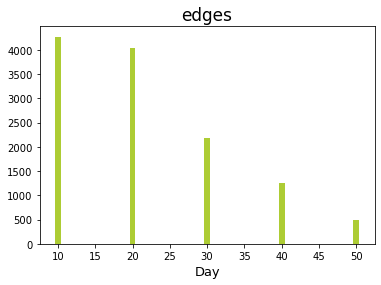

density [0.8287711124053582, 0.7835371772471365, 0.8310502283105022, 0.8430976430976431, 0.8151260504201681]


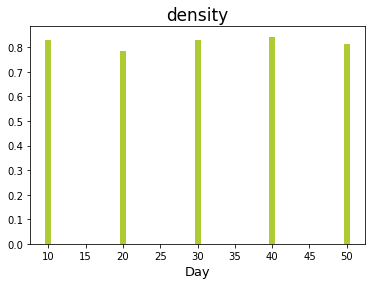

transitivity [0.8558572372474511, 0.8393503300831423, 0.8640565649169374, 0.876953090672619, 0.8714934146885929]


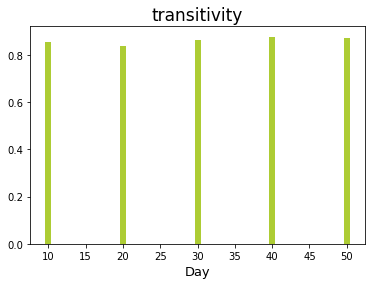

shortest_path_lenght [1.1712288875946417, 1.2164628227528635, 1.1689497716894977, 1.1569023569023569, 1.184873949579832]


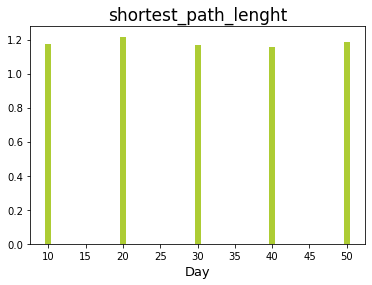

In [152]:
# TODO : PROBLEMES AVEC LES JOURS SI C'EST PAR 10
col_list = rand_color(len(dico))
plot(dico, col_list)

In [158]:
# function to return a node's neighbor nodes, ant's name and number of degree per ant as a list
def get_neighbors_degree(graph, nodes):
    neighbors2 = []
    neighbors = []
    ant = []
    degree2 = []
    for node in nodes: 
       # print(node)
        ant.append(node)
        neighbors2 = [n for n in graph.neighbors(node)]
        degree = [n[1] for n in graph.degree()]
        degree2.append(degree)
        neighbors.append(neighbors2)
        #print(neighbors2)

    return neighbors, ant, degree2

# Function toplot neighbors without weight
# TODO : qqplot loi normale
def plot_neighbors(degree):
    # plot the corresponding histogram
    plt.hist(degree, bins=50)
    plt.title("Weighted Degree Distribution", fontsize= 17) 
    plt.xlabel("Number of Neihgbors (Degrees)", fontsize= 13)
    plt.ylabel("Number of Ants (Nodes)", fontsize= 13)
    plt.show()

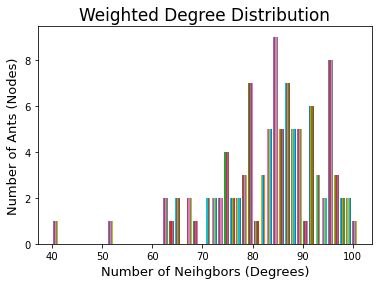

None


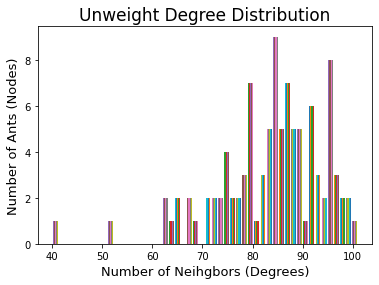

None


In [164]:
n = get_neighbors_degree(graph_d1, graph_d1.nodes)
degree = n[2]
print(plot_neighbors(degree))


Nous pouvons voir que la majorité des interactions se situe entre 70 et 100 par fourmis. Nous pouvons également voir que certaines possèdent beaucoup plus d'interactions que d'autres. Nous pouvons faire une rapide comparaisons entre J0 et J40. 

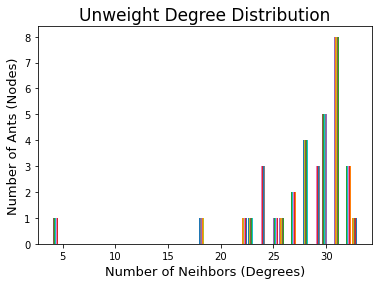

In [206]:
n = get_neighbors_degree(graph_d40, graph_d40.nodes)
degree = n[2]
plot_neighbors(degree)

Nous pouvons voir que la colonie a bien dépéri en 40 jours.

#### 2. Specific function

Assortativity, community structure (modularity, )

In [ ]:
def get_graph_specific_info(graph):
    pass

def get_core_shells(graph):
    pass

### 3. Community - clustering functions

- Node clustering coefficient : density of the subgraph induced by neighborhood.
- Average clustering coefficient : average clustering coefficient of all nodes in the graph.  
- Global clustering coefficient : fraction of all possible triangles in the graph that do exists (must be hight)

In [54]:
def get_local_cluster_coefficient(graph):
    loc_cluster = pd.DataFrame(sorted(nx.clustering(graph).items(), 
                                 key=lambda item: -item[1]), 
                      columns=["node", "LCC"])
    return loc_cluster

def get_average_clustering(graph):
    ac = nx.average_clustering(graph)
    return ac

# à partir de là, utilité à méditer
def get_generalized_degree(graph):
    gd = nx.generalized_degree(graph)
    return gd

def get_triangles(graph):
    t = nx.triangles(graph)
    return t

In [62]:
print(get_local_cluster_coefficient(graph_d1))
print(get_local_cluster_coefficient(graph_d10))
print(get_local_cluster_coefficient(graph_d20))
print(get_local_cluster_coefficient(graph_d30))
print(get_local_cluster_coefficient(graph_d40))

       node       LCC
0     Ant17  0.921147
1    Ant217  0.902616
2     Ant26  0.901282
3    Ant170  0.894053
4    Ant237  0.893455
..      ...       ...
97    Ant96  0.831581
98   Ant298  0.831581
99   Ant507  0.830212
100  Ant540  0.829932
101  Ant148  0.825347

[102 rows x 2 columns]
       node       LCC
0     Ant26  0.987179
1    Ant237  0.912821
2    Ant114  0.911348
3    Ant391  0.905769
4    Ant217  0.905341
..      ...       ...
97   Ant191  0.800866
98   Ant149  0.800247
99     Ant2  0.792833
100  Ant126  0.791518
101  Ant256  0.790726

[102 rows x 2 columns]
      node       LCC
0   Ant191  1.000000
1     Ant6  0.889897
2   Ant334  0.889266
3   Ant262  0.888992
4   Ant530  0.888471
..     ...       ...
68   Ant96  0.845238
69  Ant256  0.837662
70  Ant120  0.836310
71  Ant210  0.836158
72  Ant140  0.820704

[73 rows x 2 columns]
      node       LCC
0    Ant44  0.928205
1    Ant17  0.918051
2   Ant311  0.917548
3   Ant334  0.912892
4   Ant299  0.911111
5   Ant170  0.907493
6 

## Visualisation

In [123]:
ant_color_dict = {
    'Ant17': '#aff8df',
    'Ant217': '#ffcbc1'
}

# function to assign color for node visualization
def create_node_colors_from_graph(graph, club_color_dict):
    node_colors = []
    for node, club in list(graph.nodes(data="Ant17")):
        if club in club_color_dict:
            node_colors.append(club_color_dict[club])
    return node_colors

# get node colors for plotting
node_colors = create_node_colors_from_graph(graph_d1, ant_color_dict)


def visualisation(graph):
    pos = nx.spring_layout(graph, 
                       k=0.3, iterations=50,
                       seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_color=node_colors,
            node_size=1000,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title("Ants Network")
    plt.show()

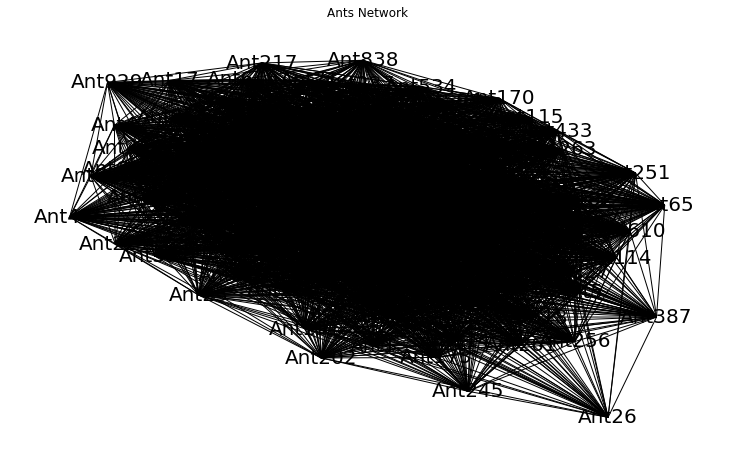

In [124]:
visualisation(graph_d1)

## Dynamic Network